In [2]:
#Load Libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import pandas_ta as ta
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
url='https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=INR&apikey=D5OBBCW29ZBREHXC'
data = requests.get(url)\
        .json()['Time Series (Digital Currency Daily)']

df = pd.DataFrame.from_dict(data)
#data.splice(index, remove_count )
#dataset = pd.read_json(data, orient ='index')
#print(df.T)
dataset=df.T
#dataset=dataset[1:]
dataset.rename({'1a. open (INR)': 'open', '2a. high (INR)': 'high','3a. low (INR)' : 'low','4a. close (INR)' : 'close','5. volume':'volume' }, axis=1, inplace=True)
dataset = dataset.apply(pd.to_numeric)
dataset.tail()
len(dataset.index)
list(dataset['high'])
print(1*1e-5)

1e-05


In [4]:
#check for data with zero shares traded
index_Zeros = dataset[ dataset['volume'] == 0].index

dataset.drop(index_Zeros , inplace = True)
dataset.loc[(dataset['volume'] == 0)]
dataset.isna().sum()

open                   0
1b. open (USD)         0
high                   0
2b. high (USD)         0
low                    0
3b. low (USD)          0
close                  0
4b. close (USD)        0
volume                 0
6. market cap (USD)    0
dtype: int64

In [5]:
#dataset.ta.indicators() -- list of indicators in ta
#help(ta.atr) -- help
dataset['ATR'] = dataset.ta.atr(length=20)
dataset['RSI'] = dataset.ta.rsi()
dataset['Average'] = dataset.ta.midprice(length=1) #midprice
dataset['MA40'] = dataset.ta.sma(length=40)
dataset['MA80'] = dataset.ta.sma(length=80)
dataset['MA160'] = dataset.ta.sma(length=160)

from scipy.stats import linregress
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
backrollingN = 6
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dataset['slopeMA40'] = dataset['MA40'].rolling(window=backrollingN).apply(get_slope, raw=True)
dataset['slopeMA80'] = dataset['MA80'].rolling(window=backrollingN).apply(get_slope, raw=True)
dataset['slopeMA160'] = dataset['MA160'].rolling(window=backrollingN).apply(get_slope, raw=True)
dataset['AverageSlope'] = dataset['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
dataset['RSISlope'] = dataset['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

In [6]:
dataset.tail(20)

,open,1b. open (USD),high,2b. high (USD),low,3b. low (USD),close,4b. close (USD),volume,6. market cap (USD),...,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope
2019-11-24,580026.11850,7311.10,581556.49065,7330.39,544317.43500,6861.00,547671.71880,6903.28,67890.206483,67890.206483,...,38.849049,562936.962825,575554.837568,636914.559527,621312.821058,-658.083825,-2902.212003,-861.161308,-9716.270786,-3.902175
2019-11-23,576625.02705,7268.23,582674.32080,7344.48,561692.59335,7080.01,580063.40595,7311.57,50449.894755,50449.894755,...,49.402736,572183.457075,576240.807645,634027.251454,620561.424397,-389.494049,-3046.188878,-871.006640,-4837.360956,-1.356804
2019-11-22,605150.71965,7627.79,614846.25000,7750.00,538684.65000,6790.00,576625.02705,7268.23,126603.140259,126603.140259,...,48.446925,576765.450000,576374.447453,631465.127629,619891.157692,-217.644806,-3057.805505,-855.071497,821.377922,-0.267218
2019-11-21,642499.25760,8098.56,645368.80455,8134.73,595012.50000,7500.00,605146.75290,7627.74,58418.780261,58418.780261,...,56.043994,620190.652275,577232.276974,628962.098462,619320.525829,59.965360,-2903.609432,-788.815580,9702.987840,2.474257
2019-11-20,645297.40305,8133.83,655647.44715,8264.29,637726.46400,8038.40,642455.62335,8098.01,32466.230980,32466.230980,...,63.600311,646686.955575,578922.132307,627179.996357,619498.548610,503.495611,-2630.455627,-595.641372,18695.326751,4.380419
2019-11-19,649475.97750,8186.50,652025.01105,8218.63,634918.00500,8003.00,645282.32940,8133.64,43556.061025,43556.061025,...,64.103804,643471.508025,580400.540033,625513.872105,619676.566433,946.580452,-2287.092330,-341.158067,19131.669251,5.041816
2019-11-18,674575.19145,8502.87,674626.75920,8503.52,639440.10000,8060.00,649529.13195,8187.17,43017.690940,43017.690940,...,64.889578,657033.429600,582128.119159,623942.216004,619921.547955,1234.419733,-2001.744169,-104.718092,18596.124000,3.770319
2019-11-17,673612.85790,8490.74,685057.72500,8635.00,662501.19780,8350.68,674537.90400,8502.40,27009.037082,27009.037082,...,69.169581,673779.461400,584602.696811,622841.799887,620399.407452,1637.348031,-1709.783152,129.209514,16925.226898,3.732958
2019-11-16,672095.97270,8471.62,677758.90500,8543.00,666414.00000,8400.00,673635.07170,8491.02,20902.299752,20902.299752,...,68.843317,672086.452500,587159.306854,622141.668512,620888.319307,1954.412058,-1391.097007,308.186441,10123.384005,2.328291
2019-11-15,685960.55730,8646.38,697354.65000,8790.00,666414.00000,8400.00,672104.69955,8471.73,46087.417751,46087.417751,...,68.255602,681884.325000,589672.441316,621327.979001,621378.877362,2185.783519,-1156.488962,386.136054,7959.363210,1.193571


In [11]:
#Target flexible way
pipdiff = 500*1e-5 #for TP
SLTPRatio = 2 #pipdiff/Ratio gives SL

def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['high'])
    low = list(df1['low'])
    close = list(df1['close'])
    open = list(df1['open'])
    trendcat = [None] * length
    
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)

            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat

In [12]:
# mytarget(barsfront to take into account, dataframe)
dataset['mytarget'] = mytarget(16, dataset)
dataset.head(20)

,open,1b. open (USD),high,2b. high (USD),low,3b. low (USD),close,4b. close (USD),volume,6. market cap (USD),...,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope,mytarget
2022-07-31,1.875848e+06,23644.64,1.886745e+06,23782.00,1.865959e+06,23520.00,1.882746e+06,23731.60,4904.91241,4904.91241,...,1.876352e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2022-07-30,1.886371e+06,23777.28,1.957036e+06,24668.00,1.864551e+06,23502.25,1.875758e+06,23643.51,151060.13211,151060.13211,...,1.910793e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2022-07-29,1.891763e+06,23845.25,1.939158e+06,24442.66,1.857552e+06,23414.03,1.886090e+06,23773.75,198298.50623,198298.50623,...,1.898355e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2022-07-28,1.821080e+06,22954.31,1.919885e+06,24199.72,1.791553e+06,22582.13,1.891579e+06,23842.93,236029.07410,236029.07410,...,1.855719e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2022-07-27,1.686239e+06,21254.67,1.833641e+06,23112.63,1.669409e+06,21042.53,1.820933e+06,22952.45,210971.19796,210971.19796,...,1.751525e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2022-07-26,1.690700e+06,21310.90,1.693629e+06,21347.82,1.642750e+06,20706.50,1.686239e+06,21254.67,177817.24326,177817.24326,...,1.668190e+06,NaN,NaN,NaN,NaN,NaN,NaN,-44607.248441,NaN,0.0
2022-07-25,1.791157e+06,22577.13,1.798207e+06,22666.00,1.685869e+06,21250.00,1.690700e+06,21310.90,180344.76643,180344.76643,...,1.742038e+06,NaN,NaN,NaN,NaN,NaN,NaN,-46813.373454,NaN,0.0
2022-07-24,1.780958e+06,22448.58,1.825866e+06,23014.64,1.765771e+06,22257.15,1.791359e+06,22579.68,115189.67277,115189.67277,...,1.795819e+06,NaN,NaN,NaN,NaN,NaN,NaN,-26773.171116,NaN,0.0
2022-07-23,1.799701e+06,22684.83,1.824766e+06,23000.77,1.740179e+06,21934.57,1.781156e+06,22451.07,122137.77375,122137.77375,...,1.782473e+06,NaN,NaN,NaN,NaN,NaN,NaN,-4557.206404,NaN,0.0
2022-07-22,1.836779e+06,23152.19,1.884721e+06,23756.49,1.785038e+06,22500.00,1.799701e+06,22684.83,171598.43966,171598.43966,...,1.834879e+06,NaN,NaN,NaN,NaN,NaN,NaN,23240.054893,NaN,0.0


C:\Users\krish\AppData\Local\Temp\ipykernel_18360\3181447827.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_model.hist(ax = ax)


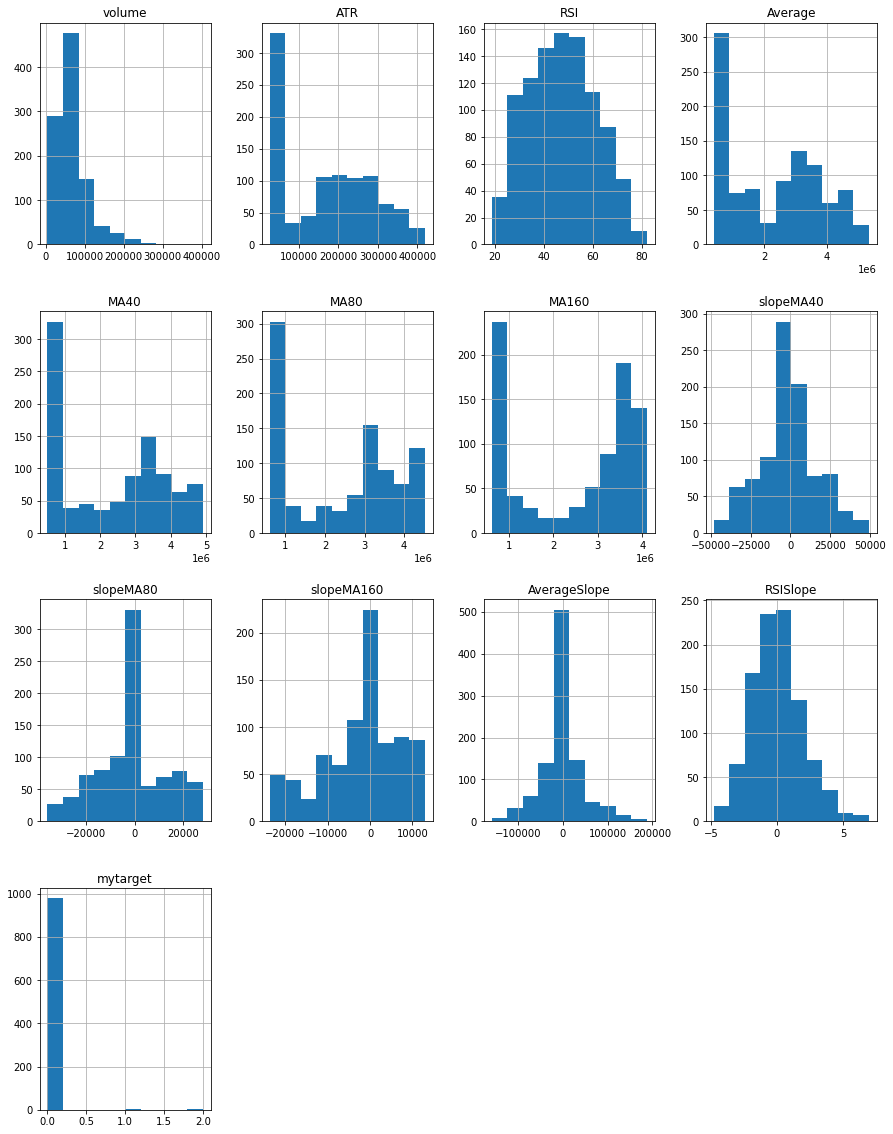

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_model= dataset[['volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope', 'mytarget']] 
df_model.hist(ax = ax)
plt.show()

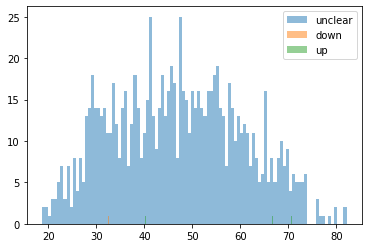

In [10]:
from matplotlib import pyplot
df_up=dataset.RSI[ dataset['mytarget'] == 2 ]
df_down=dataset.RSI[ dataset['mytarget'] == 1 ]
df_unclear=dataset.RSI[ dataset['mytarget'] == 0 ]
pyplot.hist(df_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(df_down, bins=100, alpha=0.5, label='down')
pyplot.hist(df_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()